In [1]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)
import time

In [2]:
eps  = 1e-4 # This is the time scale.
tend = 400*eps
dt   = 0.1*eps

numNeurons = 10
displaynum = min(10,numNeurons)
neurons = []


for i in range(numNeurons):
    if i==0:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend, eps=eps, a=np.random.uniform(0.6,0.9),b=np.random.uniform(0.5,0.9),tau=np.random.uniform(10,14),I=I)
    n.Initialize([-2,0])
    n.SetNoise(0,0.0)
    n.SetFlow(n.FHNFlow)
    n.SetSynapseLimit(np.random.uniform(980,1020))
    neurons.append(n)
    
b = Brain(neurons=neurons,dt=dt,tend=tend,connectionscale=5000)
for i in tnrange(100,desc='Syn Dev'):
    b.DevelopSynapseNetwork()
b.Simulate()

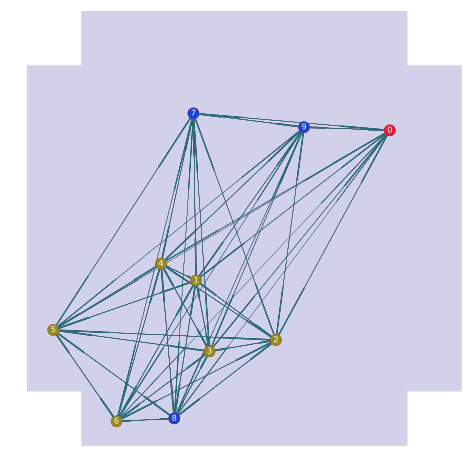

In [3]:
plt.rcParams["figure.figsize"] = (8,8)
vis = Visualization(network=b._Network,neurons=b._Neurons, synapsecount=b._SynapseCountHistory)
vis._EdgeLabels = b._EdgeLabels
vis._NetworkEdgeWeightFactor = 4
vis.DrawNetwork(edgelabels=False)

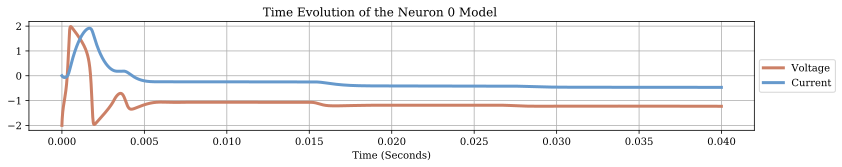

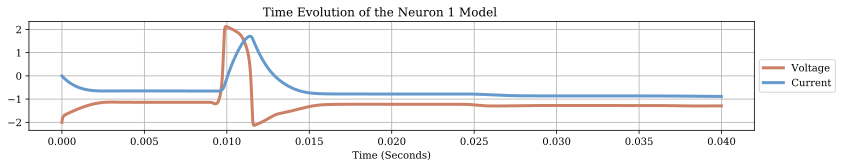

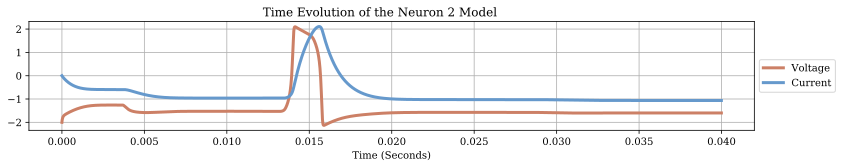

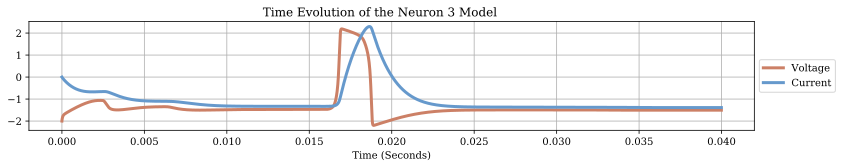

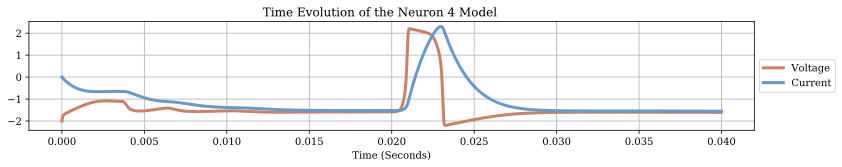

Displaying 5 active neurons. 2 more active neurons are present.


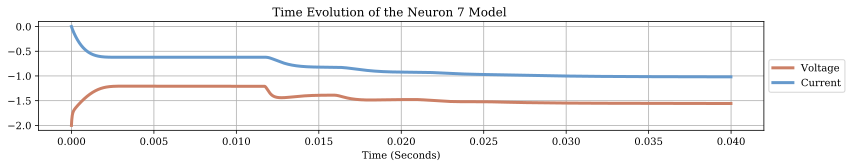

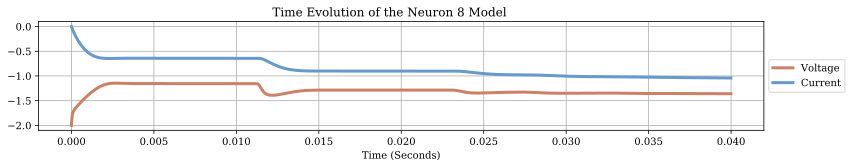

Displaying 2 inactive neurons. 1 more inactive neurons are present.


In [4]:
plt.rcParams["figure.figsize"] = (13, 2)
b.CollectActiveNeurons()
ActiveNeurons = b._ActiveNeurons;
numberToShow = min(5,len(ActiveNeurons))
for n in range(numberToShow):
    ActiveNeurons[n].PlotState(states={0:"V",1:"w"},legend=["Voltage","Current"],colors=[[0.8,0.5,0.4],[0.4,0.6,0.8]])
print("Displaying {} active neurons. {} more active neurons are present.".format(numberToShow,len(ActiveNeurons)-numberToShow))

InactiveNeurons = b._InactiveNeurons;
numberToShow = min(2,len(InactiveNeurons))
for n in range(numberToShow):
    InactiveNeurons[n].PlotState(states={0:"V",1:"w"},legend=["Voltage","Current"],colors=[[0.8,0.5,0.4],[0.4,0.6,0.8]])
print("Displaying {} inactive neurons. {} more inactive neurons are present.".format(numberToShow,len(InactiveNeurons)-numberToShow))

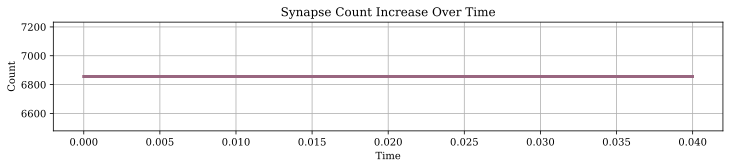

6856


In [5]:
plt.rcParams["figure.figsize"] = (12, 2)
vis.PlotSynapseRank()
print(b._SynapseCount)

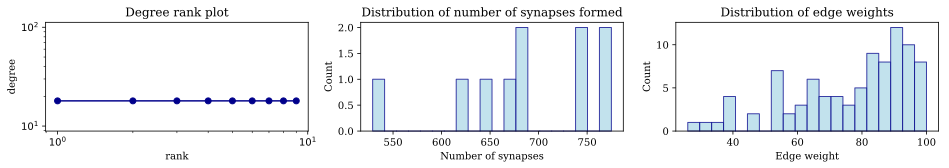

In [6]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotConnectivityProperties()

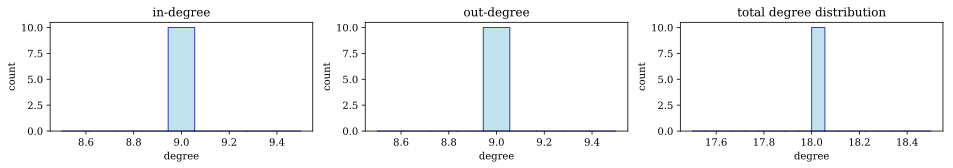

In [7]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotDegreeDistribution()

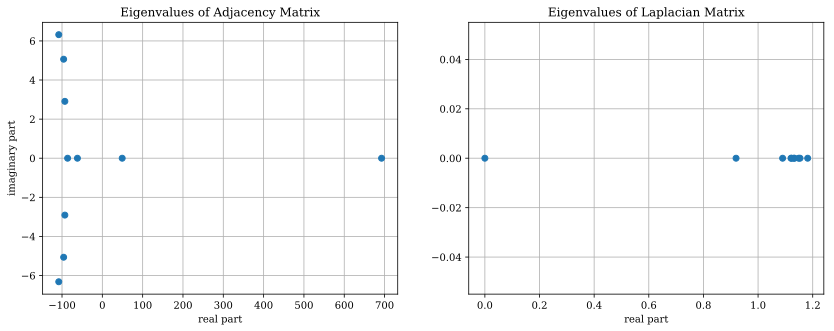

In [8]:
plt.rcParams["figure.figsize"] = (14,5)
vis.PlotEigenValues()